In [9]:
import os
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

Другие примеры визуализации большего числа измерений можно посмотреть тут: 
https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57

In [3]:
df = pd.read_excel('data_lessons/df.xlsx')

In [4]:
df.head()

,Unnamed: 0,Unnamed: 0.1,product_id,quantity,name,date
0,0,0,56,4,Vasiliy_Fedorov,2020-12-06
1,1,1,97,3,Vasiliy_Fedorov,2020-12-06
2,2,2,79,3,Vasiliy_Fedorov,2020-12-06
3,3,3,29,5,Vasiliy_Fedorov,2020-12-06
4,0,0,73,5,Alexey_Fedorov,2020-12-08


In [100]:
#общие настройки графика
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
)

In [5]:
df_agg = df.groupby(['product_id'],as_index = False).agg({'quantity':'sum'}).sort_values('quantity', ascending = False)

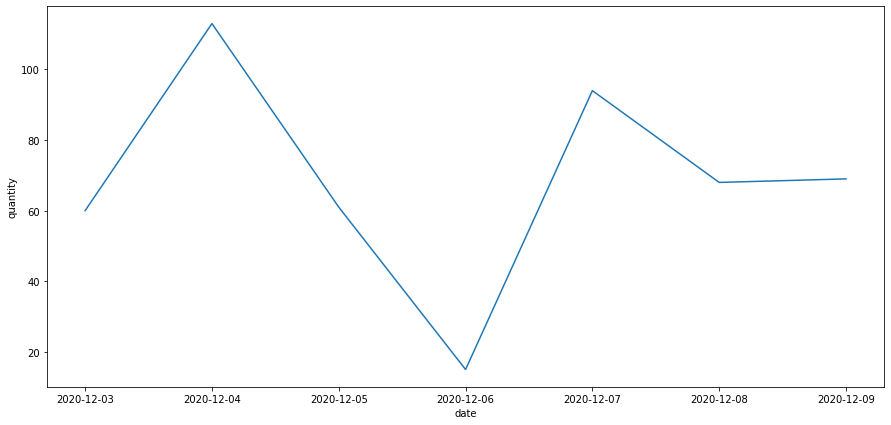

In [34]:
df_agg2 = df.groupby(['date'],as_index = False).agg({'quantity':'sum'}).sort_values('quantity', ascending = False)
plt.figure(figsize=(15, 7))
sns.lineplot(data=df_agg2, x="date", y="quantity")

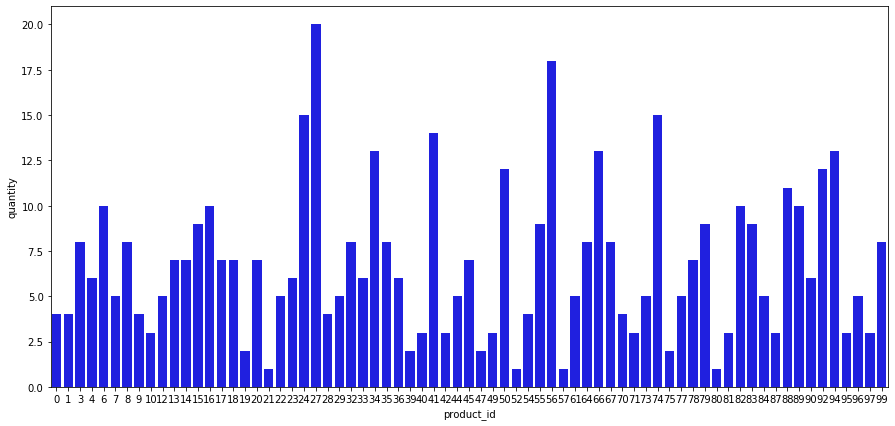

In [27]:
# sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 7))
ax = sns.barplot(x="product_id", y="quantity", data=df_agg, color = 'blue')

In [96]:
import plotly.express as px

px.bar(x=df_agg.date, y=df_agg.quantity)

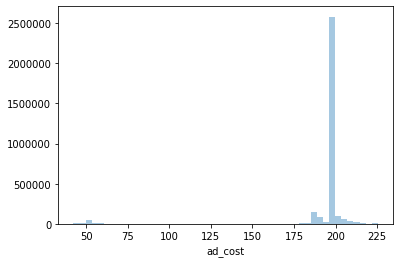

In [33]:
#график распределения
ads_data = pd.read_csv('data_lessons/ads_data.csv.zip', compression='zip')
sns.distplot(ads_data.ad_cost, kde=False)

In [97]:
data = pd.read_csv('data_lessons/nyc.csv.zip', compression='zip', sep = ',')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2ab83650>,
      dtype=object)

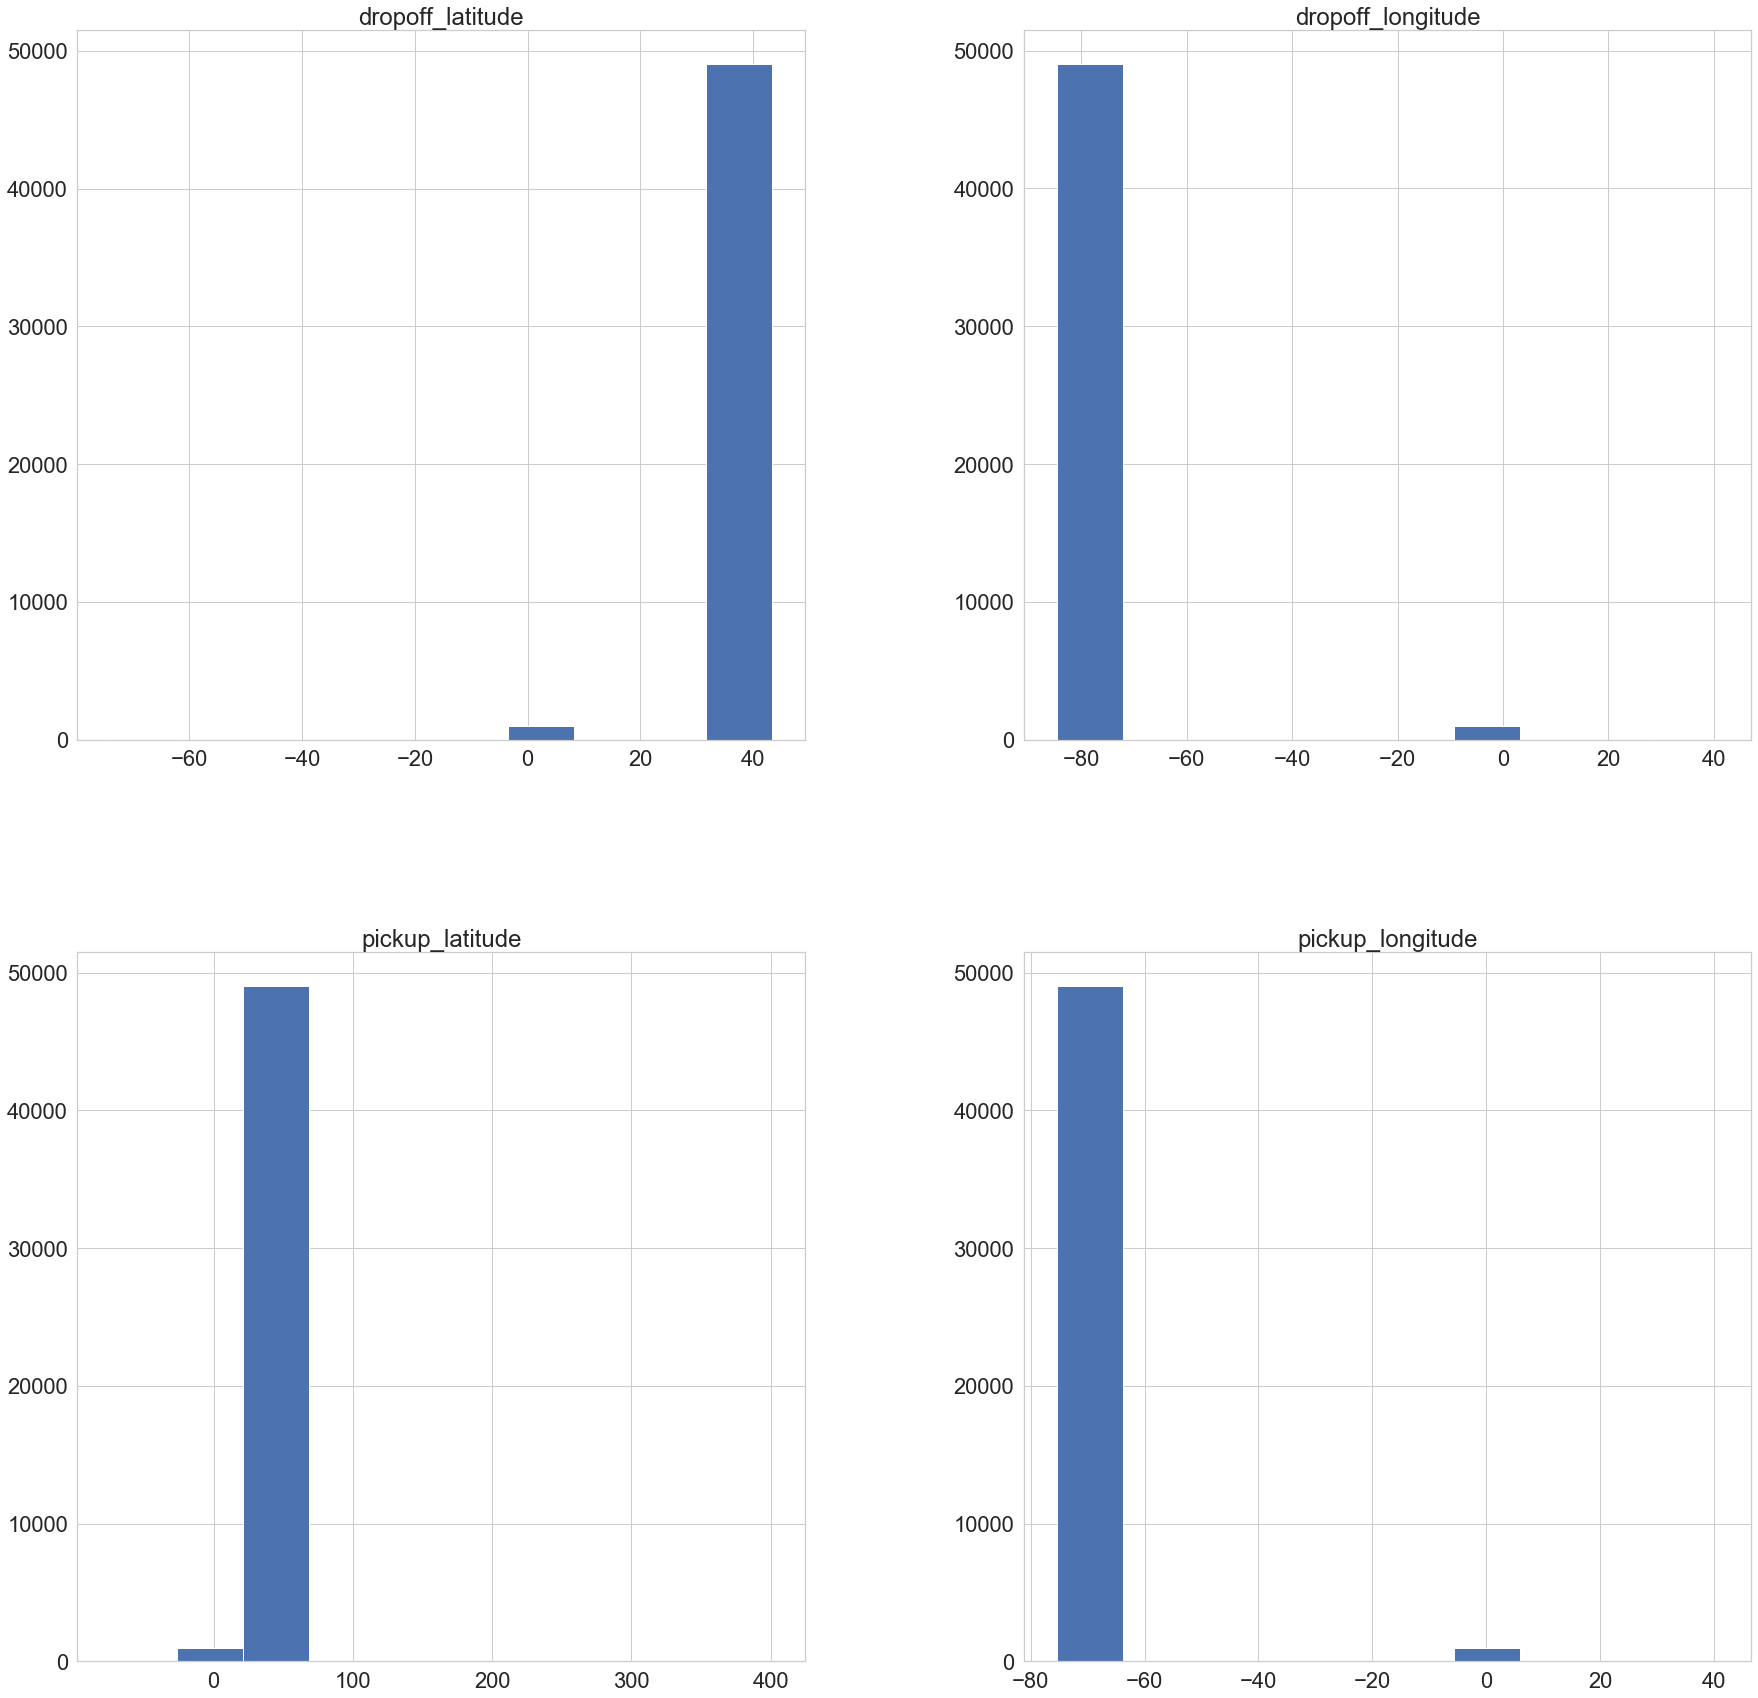

In [102]:
data[['dropoff_latitude','dropoff_longitude', 
                         'pickup_latitude','pickup_longitude']].hist(figsize=(30, 30))

In [42]:
ads_data.head(5)

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id
0,23456,1554076848,view,2019-04-01,CPM,0,5681,23456,android,190.0,125560,793
1,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,1041
2,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,41
3,42987,1554135866,view,2019-04-01,CPM,0,28541,42985,ios,199.1,80160,898
4,23456,1554135866,view,2019-04-01,CPM,0,5681,23456,web,190.0,125560,29


In [40]:
ads_data = ads_data.fillna(0)
ads_data_agg = ads_data.groupby(['date'], as_index = False).agg({'ad_cost':'sum'})
ax = sns.heatmap(ads_data)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

# Интерактивные графики

In [45]:
import plotly.express as px

agg = ads_data.head(10)
px.line(agg, agg.index, agg['ad_cost'])

# Несколько графиков

Ваша задача — построить графики скользящего среднего с разными значениями параметра window (2, 4, 10, 50), посмотреть на изменения и соотнести приведенные ниже картинки с соответствующим значением размера окна.

In [46]:
avocado_mean = pd.read_csv("data_lessons/avocado_mean.csv",
                           index_col=0, squeeze=True, parse_dates=['Date'])

In [49]:
avocado_mean.head()

Date
2015-01-04    1.301296
2015-01-11    1.370648
2015-01-18    1.391111
2015-01-25    1.397130
2015-02-01    1.247037
Name: AveragePrice, dtype: float64

In [47]:
win_2 = avocado_mean.rolling(window = 2).mean()
win_4 = avocado_mean.rolling(window = 4).mean()
win_10 = avocado_mean.rolling(window = 10).mean()
win_50 = avocado_mean.rolling(window = 50).mean()

In [69]:
pd.DataFrame(win_2).head(5)

,AveragePrice
Date,
2015-01-04,NaN
2015-01-11,1.335972
2015-01-18,1.380880
2015-01-25,1.394120
2015-02-01,1.322083


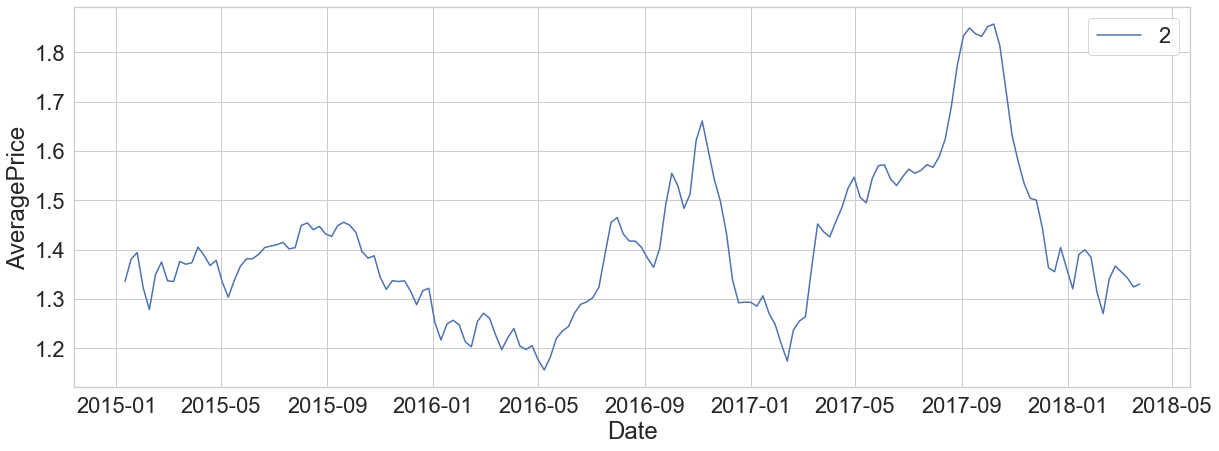

In [68]:
sns.lineplot(x=win_2.index, y=pd.DataFrame(win_2).AveragePrice, label = '2')

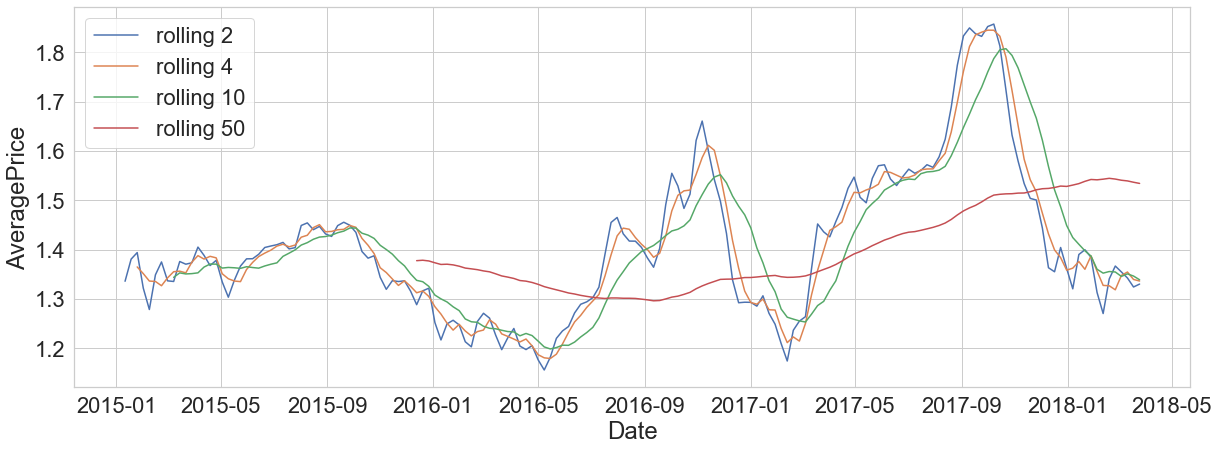

In [71]:
window = [2, 4, 10, 50]
for w in window:
    df1=avocado_mean.rolling(window = w).mean()
    sns.lineplot(x=df1.index, y=pd.DataFrame(df1).AveragePrice, label = f'rolling {w}')

### Как построить несколько графиков рядом друг с другом?

Для этого можно использовать plt.subplots(). Благодаря этому методу мы разобьём общее полотно графика на части и получим матрицу, где в каждой ячейке можно размесить свой график. Функция принимает несколько параметров:

- nrows – число рядов/строк, на которые мы разделим полотно
- ncols – число колонок, на которые мы разделим полотно
- figsize – размер картинки, общего полотна
- sharey – будет ли ось y общей для графиков (пошаренной) и между какими (можно задать общую ось между всеми графиками, между графиками одной строки или одного столбца)
- sharex – то же самое для оси x

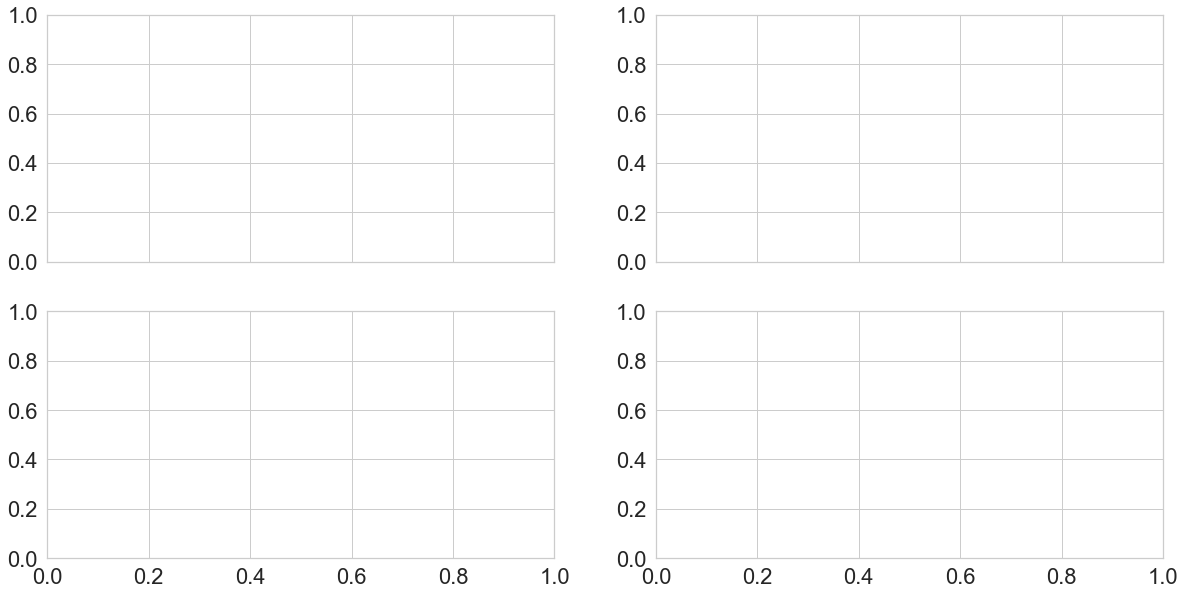

In [72]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10), sharey='col', sharex=True)

In [76]:
import matplotlib.dates as mdates

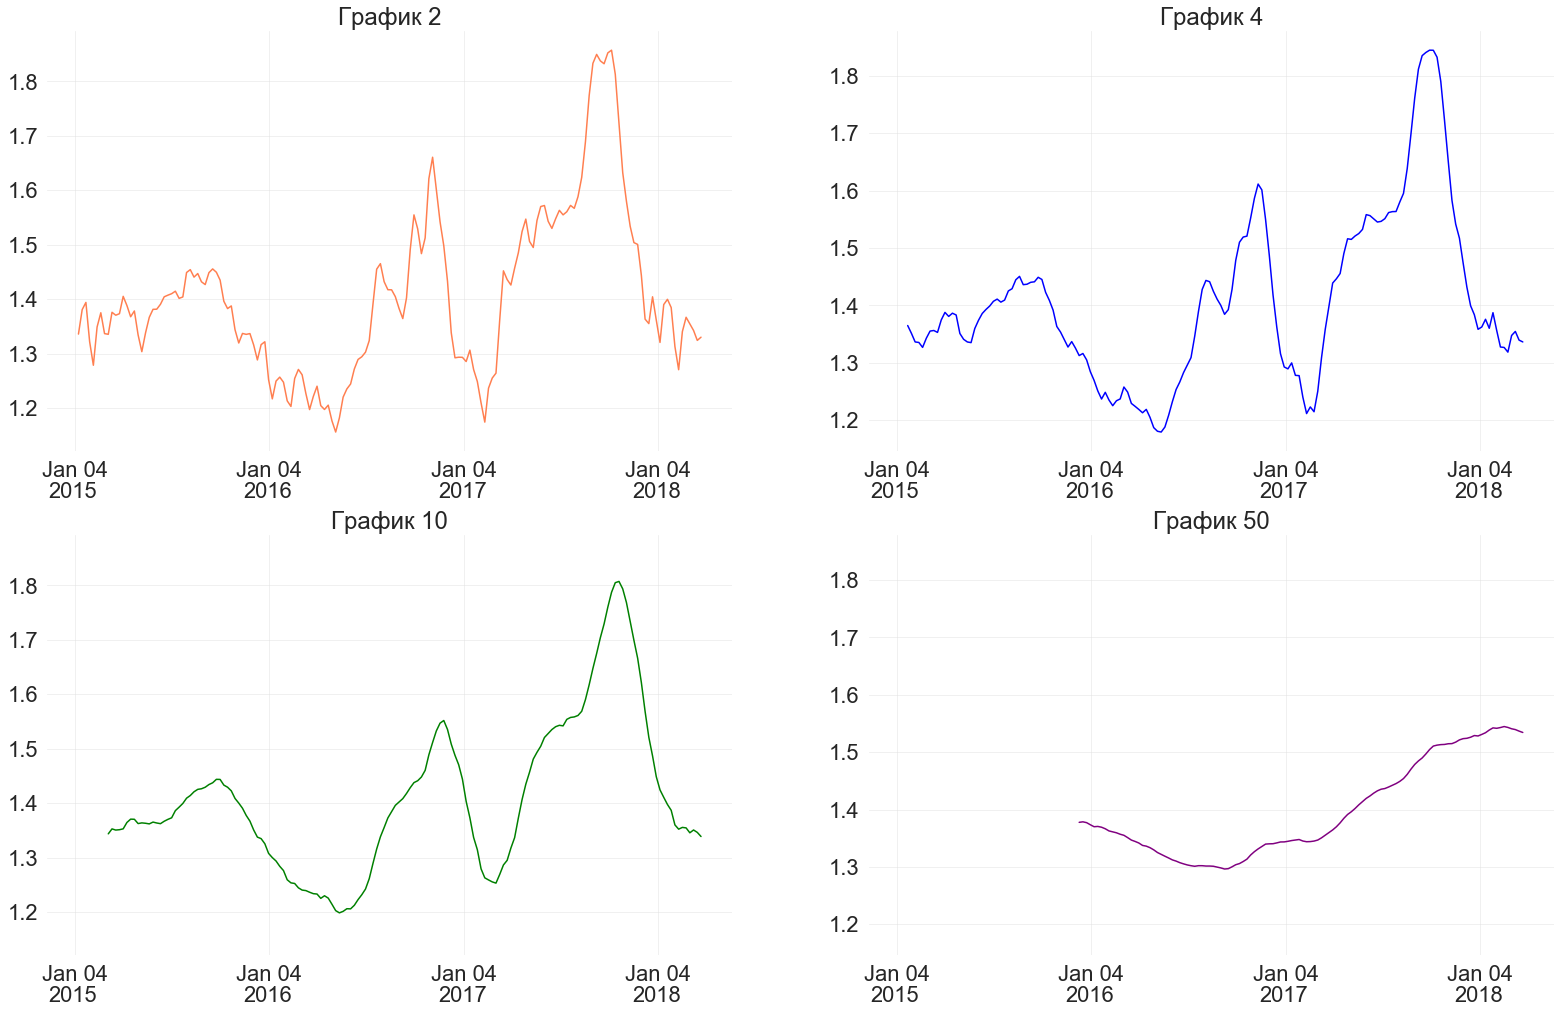

In [92]:
colors = ['coral', 'blue', 'green', 'purple']
windows = [2, 4, 10, 50]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(27, 17), sharey='col', sharex=True)

for window, ax, color in zip(windows, axes.flatten(), colors): 
    ax.plot(avocado_mean.rolling(window=window).mean(), label=window, color=color)
    
    ax.set(title=f'График {window}'.format(name))
    ax.tick_params(labelbottom=True, which='both')

    # удаляем рамку
    ax.set_frame_on(False)  
    # устанавливаем major locator – 4 января для каждого года
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=1, bymonthday=4))  
    # показывать в формате сокращенного названия месяца и дня (Jan 04)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    # под major locator - minor locator, т.е. редактируем minor ticks
    ax.xaxis.set_minor_locator(mdates.YearLocator(month=1, day=1))
    # показываем год
    ax.xaxis.set_minor_formatter(mdates.DateFormatter('\n%Y'))
    # делаем сетку графика совсем немного серой и наполовину прозрачной
    ax.grid(True, color='#e2e2e2', alpha=0.5)
    
    

In [81]:
plt.show()